<a href="https://colab.research.google.com/github/VirajDilshanKumarage/AI-and-Machine-Learning/blob/hyperperameter_optimization/hyperperameter_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Optimization
(HyperparameterTuning)

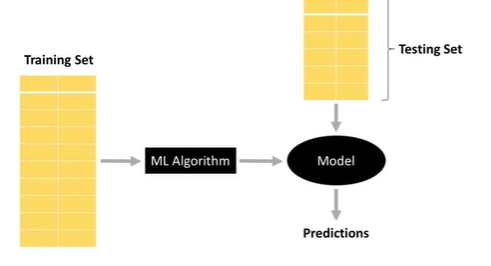

how to find the best parameters instead of default parameter

In [14]:
import pandas as pd
import numpy as np
data=pd.read_csv('Iris.csv')
x=data.drop(['Species','Id'],axis=1)
y=data['Species']

In [15]:
x.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
109,7.2,3.6,6.1,2.5
45,4.8,3.0,1.4,0.3
107,7.3,2.9,6.3,1.8
76,6.8,2.8,4.8,1.4
88,5.6,3.0,4.1,1.3


In [16]:
y.sample(5)

58     Iris-versicolor
147     Iris-virginica
121     Iris-virginica
97     Iris-versicolor
143     Iris-virginica
Name: Species, dtype: object

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [18]:
from sklearn.svm import SVC
model=SVC(C=0.1,kernel='rbf')

In [19]:
model.fit(x_train,y_train)

SVC(C=0.1)

In [20]:
model.score(x_test,y_test)

0.7777777777777778

In [21]:
model.score(x_test,y_test)

0.7777777777777778

When we change those parameters mannualy it is very hard to do. Due to that we use two methods such as GridSearchCV and RandomizedSearchCV

# ***GridSearchCV***

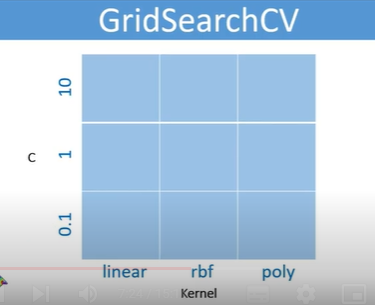

# **RandomizedSearchCV**

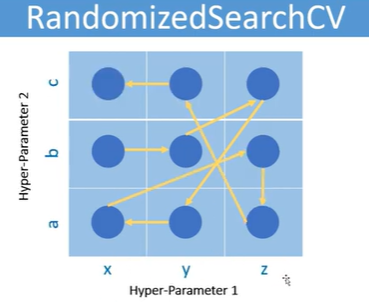

GridSearchCV implementation

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid={'C':[0.1,1,10],'kernel':['rbf','linear','poly']}

In [24]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(C=0.1),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly']})

In [25]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [26]:
grid_search.score(x_test,y_test)

0.9555555555555556

# ***RandomizedSearchCV implimantation***

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
param_dist={'C':[0.1,1,10],'kernel':['rbf','linear','poly']}

In [41]:
randomized_search=RandomizedSearchCV(estimator=model,param_distributions=param_dist,n_iter=9)
randomized_search.fit(x_train,y_train)

RandomizedSearchCV(estimator=SVC(C=0.1), n_iter=9,
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'poly']})

In [42]:
randomized_search.best_params_

{'kernel': 'linear', 'C': 1}

In [43]:
randomized_search.score(x_test,y_test)

0.9555555555555556